In [39]:
import os
import json
import warnings

import utils as ut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML, display


In [40]:
%matplotlib inline


# Global

In [41]:
dark_mode = True


In [42]:
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.max_open_warning'] = 100
plt.style.use(['dark_background' if dark_mode else 'default'])
pd.set_option('display.max_colwidth', None)


# Data

## Load

In [43]:
# load data
root = ut.get_value(json.load(open('settings.json')), 'data.input')
path = os.path.join(root, 'forest-21', '*.zip')
data = ut.load_data(path, limit=10)


extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-37-41
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-38-02
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-38-33
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-39-05
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-39-33
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-40-01
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-40-34
extract /tmp/tmppennzgk6/AOS-Simulation-2022-03-06-17-41-14


In [44]:
# select simulation
index = 0
simulation = list(data.keys())[index]
print('simulations:\n', '\n '.join([f'{i:02d}: ' + (f'{x} [x]' if x == simulation else x) for i, x in enumerate(list(data.keys()))]))


simulations:
 00: AOS-Simulation-2022-03-06-17-37-41 [x]
 01: AOS-Simulation-2022-03-06-17-38-02
 02: AOS-Simulation-2022-03-06-17-38-33
 03: AOS-Simulation-2022-03-06-17-39-05
 04: AOS-Simulation-2022-03-06-17-39-33
 05: AOS-Simulation-2022-03-06-17-40-01
 06: AOS-Simulation-2022-03-06-17-40-34
 07: AOS-Simulation-2022-03-06-17-41-14


## Preview

In [45]:
# show images
df_images = data[simulation]['images']
df_images.filter(regex=r'^(?:(?!data).)*$')


,number,name,type,x,y,z,url
0,1,image-1-monochrome.png,monochrome,-75.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-75.00&drone.northSouth=5.00&drone.camera.view=90
1,2,image-2-monochrome.png,monochrome,-74.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-74.00&drone.northSouth=5.00&drone.camera.view=90
2,3,image-3-monochrome.png,monochrome,-73.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-73.00&drone.northSouth=5.00&drone.camera.view=90
3,4,image-4-monochrome.png,monochrome,-72.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-72.00&drone.northSouth=5.00&drone.camera.view=90
4,5,image-5-monochrome.png,monochrome,-71.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-71.00&drone.northSouth=5.00&drone.camera.view=90
...,...,...,...,...,...,...,...
146,147,image-147-monochrome.png,monochrome,71.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=71.00&drone.northSouth=5.00&drone.camera.view=90
147,148,image-148-monochrome.png,monochrome,72.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=72.00&drone.northSouth=5.00&drone.camera.view=90
148,149,image-149-monochrome.png,monochrome,73.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=73.00&drone.northSouth=5.00&drone.camera.view=90
149,150,image-150-monochrome.png,monochrome,74.0,0.0,5.0,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=74.00&drone.northSouth=5.00&drone.camera.view=90


In [46]:
# show trees
df_trees = data[simulation]['trees']
df_trees


,tree,position.x,position.y,position.z,box.min.x,box.min.y,box.min.z,box.max.x,box.max.y,box.max.z
0,1,-49.680927,0.0,68.184723,-57.810970,0.0,62.974789,-43.895226,21.855457,75.913269
1,2,57.781857,0.0,-43.160156,49.770603,0.0,-50.222214,64.850151,21.604683,-35.142063
2,3,-23.378712,0.0,44.097115,-29.216894,0.0,37.086361,-14.582086,21.859879,51.846897
3,4,-31.343758,0.0,39.550213,-36.877926,0.0,32.783478,-25.143549,21.534082,44.635437
4,5,-21.856693,0.0,52.035313,-28.723108,0.0,43.291656,-13.494293,22.670832,58.520473
...,...,...,...,...,...,...,...,...,...,...
295,296,-57.451389,0.0,19.198940,-62.510376,0.0,13.123078,-52.078075,22.677805,26.218575
296,297,14.287553,0.0,11.282220,9.072608,0.0,5.111918,22.222578,21.758745,19.313192
297,298,25.795835,0.0,20.282452,16.980070,0.0,13.367192,32.058502,21.849976,28.192564
298,299,-30.279554,0.0,21.780756,-36.923531,0.0,14.897776,-21.974895,21.382334,29.813272


In [47]:
# show persons
df_persons = data[simulation]['persons']
df_persons


""


In [48]:
# show parameters
parameters = data[simulation]['parameters']
print('parameters:', json.dumps(parameters, indent=4))


parameters: {
    "drone": {
        "speed": 10,
        "height": 40,
        "rotation": 0,
        "camera": {
            "view": 90,
            "resolution": 512,
            "sampling": 1,
            "type": "monochrome"
        },
        "coverage": 79.99999999999999
    },
    "forest": {
        "size": 300,
        "ground": 70,
        "persons": {
            "count": 0,
            "activities": {
                "laying": true,
                "sitting": false,
                "standing": true,
                "waving": true,
                "injured": false,
                "walking": true,
                "running": false
            }
        }
    },
    "material": {
        "color": {
            "tree": 6370837,
            "twig": 5601109,
            "ground": 65793,
            "plane": 16777215,
            "person": 16744319,
            "background": 8900331
        }
    },
    "capture": true,
    "preset": "forest-21",
    "url": "https://aos.tensorwar

In [49]:
# show subsamples
N, M = ut.sample_data(parameters)
print('subsamples:', json.dumps({'N': N, 'M': M}, indent=4))


subsamples: {
    "N": {
        "80": 1,
        "40": 2,
        "27": 3,
        "20": 4,
        "16": 5,
        "13": 6,
        "11": 7,
        "10": 8,
        "9": 9,
        "8": 10,
        "7": 11,
        "6": 13,
        "5": 16,
        "4": 20,
        "3": 27,
        "2": 40,
        "1": 80
    },
    "M": {
        "80": 1.0,
        "40": 2.0,
        "27": 3.0,
        "20": 4.0,
        "16": 5.0,
        "13": 6.0,
        "11": 7.0,
        "10": 8.0,
        "9": 9.0,
        "8": 10.0,
        "7": 11.0,
        "6": 13.0,
        "5": 16.0,
        "4": 20.0,
        "3": 27.0,
        "2": 40.0,
        "1": 80.0
    }
}


# Plots

## Original Images

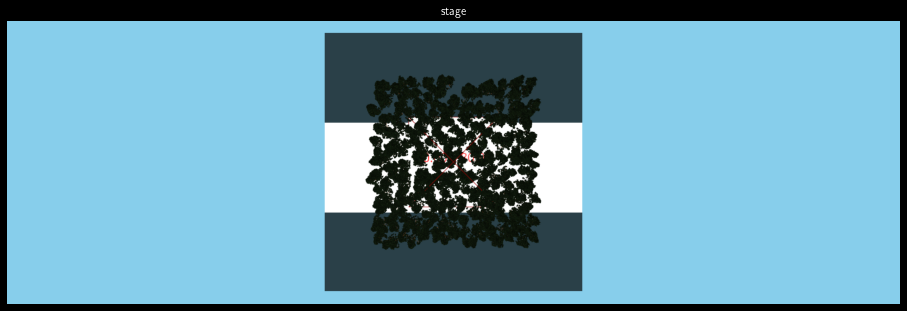

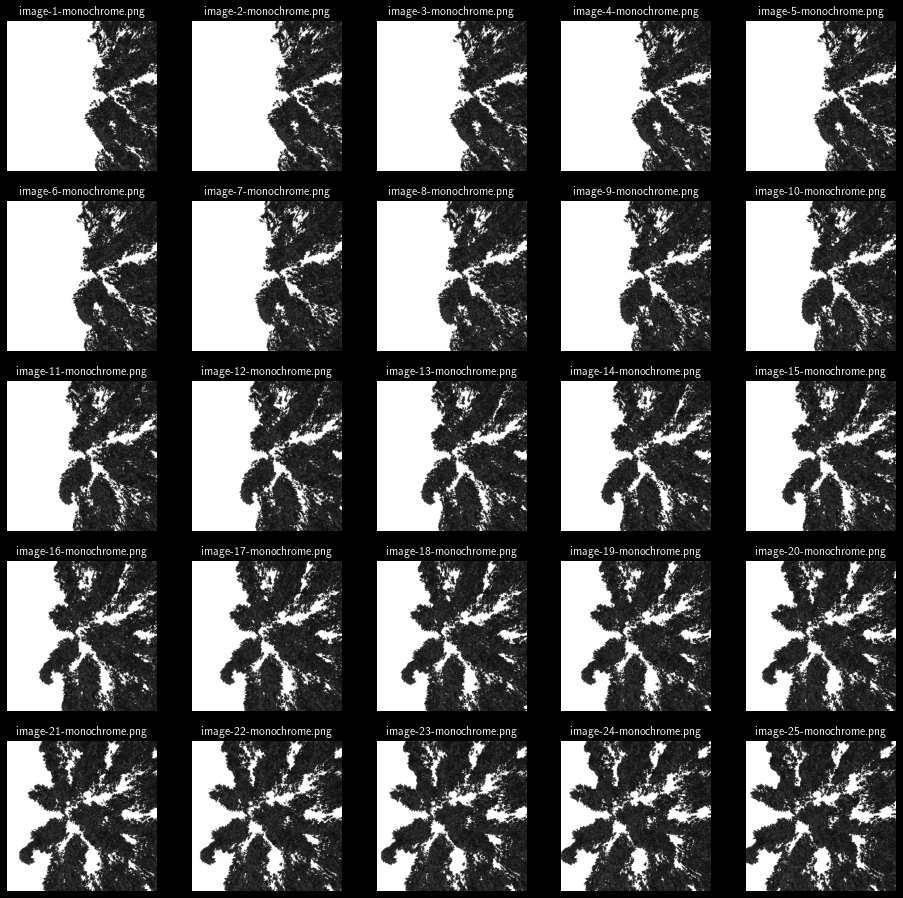

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))

# plot stage image
ut.plot_image(ax, data[simulation]['stage'], 'stage')

# plot first images
_ = ut.plot_images(df_images['data'], df_images['name'])


## Sampled Images

In [51]:
df_sampled = df_images.iloc[::N[10], :][['number', 'x', 'z', 'url']]

# simulation urls
display(HTML(df_sampled.style.format({'url': lambda x: f'<a onclick="document.getElementById(\'aos-simulation\').src=\'{x}\'">{x}</a>'})._repr_html_()))


,number,x,z,url
0,1,-75.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-75.00&drone.northSouth=5.00&drone.camera.view=90
8,9,-67.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-67.00&drone.northSouth=5.00&drone.camera.view=90
16,17,-59.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-59.00&drone.northSouth=5.00&drone.camera.view=90
24,25,-51.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-51.00&drone.northSouth=5.00&drone.camera.view=90
32,33,-43.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-43.00&drone.northSouth=5.00&drone.camera.view=90
40,41,-35.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-35.00&drone.northSouth=5.00&drone.camera.view=90
48,49,-27.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-27.00&drone.northSouth=5.00&drone.camera.view=90
56,57,-19.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-19.00&drone.northSouth=5.00&drone.camera.view=90
64,65,-11.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-11.00&drone.northSouth=5.00&drone.camera.view=90
72,73,-3.000000,5.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=40&drone.rotation=0&drone.eastWest=-3.00&drone.northSouth=5.00&drone.camera.view=90


In [52]:
# simulation iframe
display(HTML(f'<iframe id="aos-simulation" src="{parameters["url"]}" width="1028" height="720" frameborder="0" allowfullscreen>'))


## Integrated Images

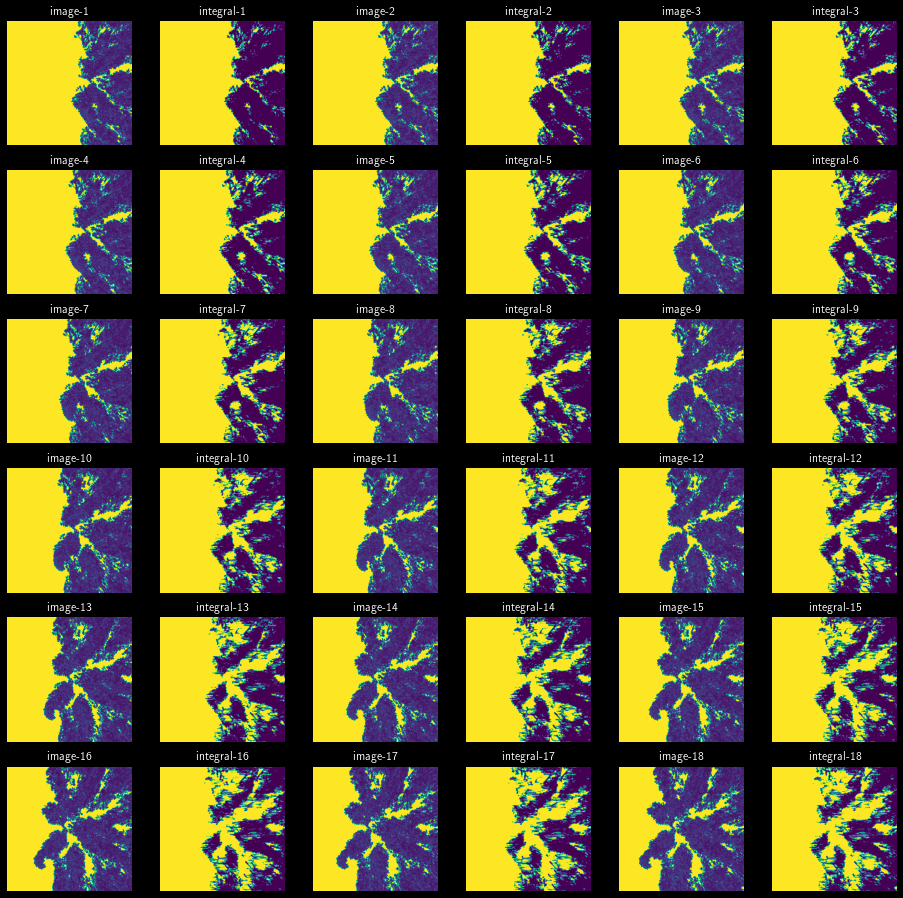

In [54]:
df_integrate = df_images.head(18)

# integrate images
integrated = ut.integrate_image(df_integrate, parameters, N=30)

# grayscale images
grayscaled = np.array([ut.grayscale_image(x) for x in df_integrate['data']])

# stack integrated images
image_vs_integrated = np.hstack([grayscaled, integrated]).reshape(integrated.shape * np.array([2, 1, 1]))
image_vs_integrated_labels = np.dstack(['image-' + df_integrate['number'].astype(str), 'integral-' + df_integrate['number'].astype(str)]).flatten()

# plot integrated images
_ = ut.plot_images(image_vs_integrated, image_vs_integrated_labels, rows=6, cols=6)


## Integrated Ground

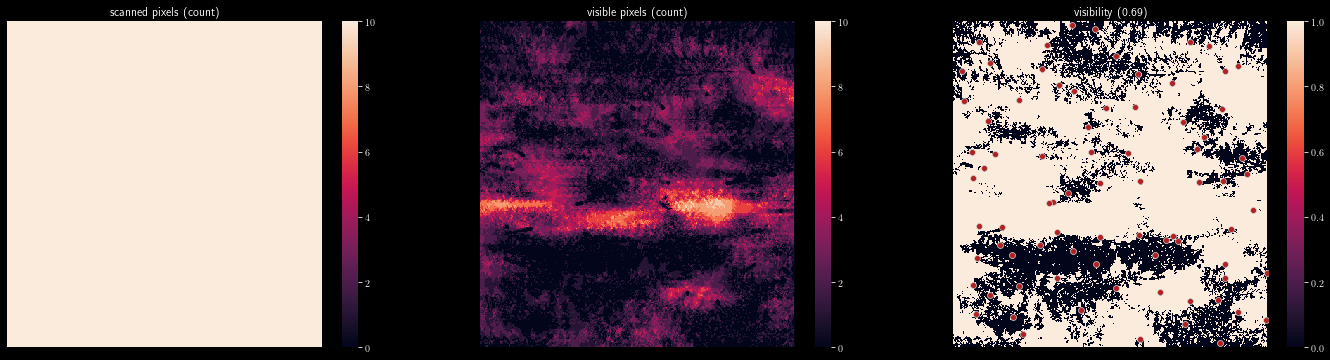

In [56]:
df_integrate = df_images.iloc[::N[10], :]

# integrate ground
ground, alphas = ut.integrate_ground(df_integrate, parameters)

# calculate statistics
statistics = ut.calculate_statistics(df_integrate, df_trees, ground, parameters)

# plot integrated ground
fig, axs = ut.plot_ground(ground, ['scanned pixels (count)', 'visible pixels (count)', f'visibility ({statistics["ground_visibility"]:.2f})'])

# plot tree positions
ground_rect = [[0, ground.shape[0]], [0, ground.shape[1]]]
trees_pos = ut.ground_positions(df_trees[['position.x', 'position.z']], ground_rect, parameters)
_ = axs[2].scatter(*trees_pos.T, marker='o', facecolor='firebrick', edgecolor='lightgray', linewidth=0.7)
